# MEME KANSERİ SINIFLANDIRMA MODELLERİ

## VERİ ÖN İŞLEME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [4]:
X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [5]:
y

,Class
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [6]:
df = pd.concat([X, y], axis = 1)#özellikler ve çıktı sütüunlatını tek bir data frame haline gitirdik

In [7]:
df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [9]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
df["Class"].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [11]:
#2 benign (iyi huylu) 4 malignant (kötü huylu) hücreleri temsil ediyor. 

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [14]:
df["Class"].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [15]:
df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


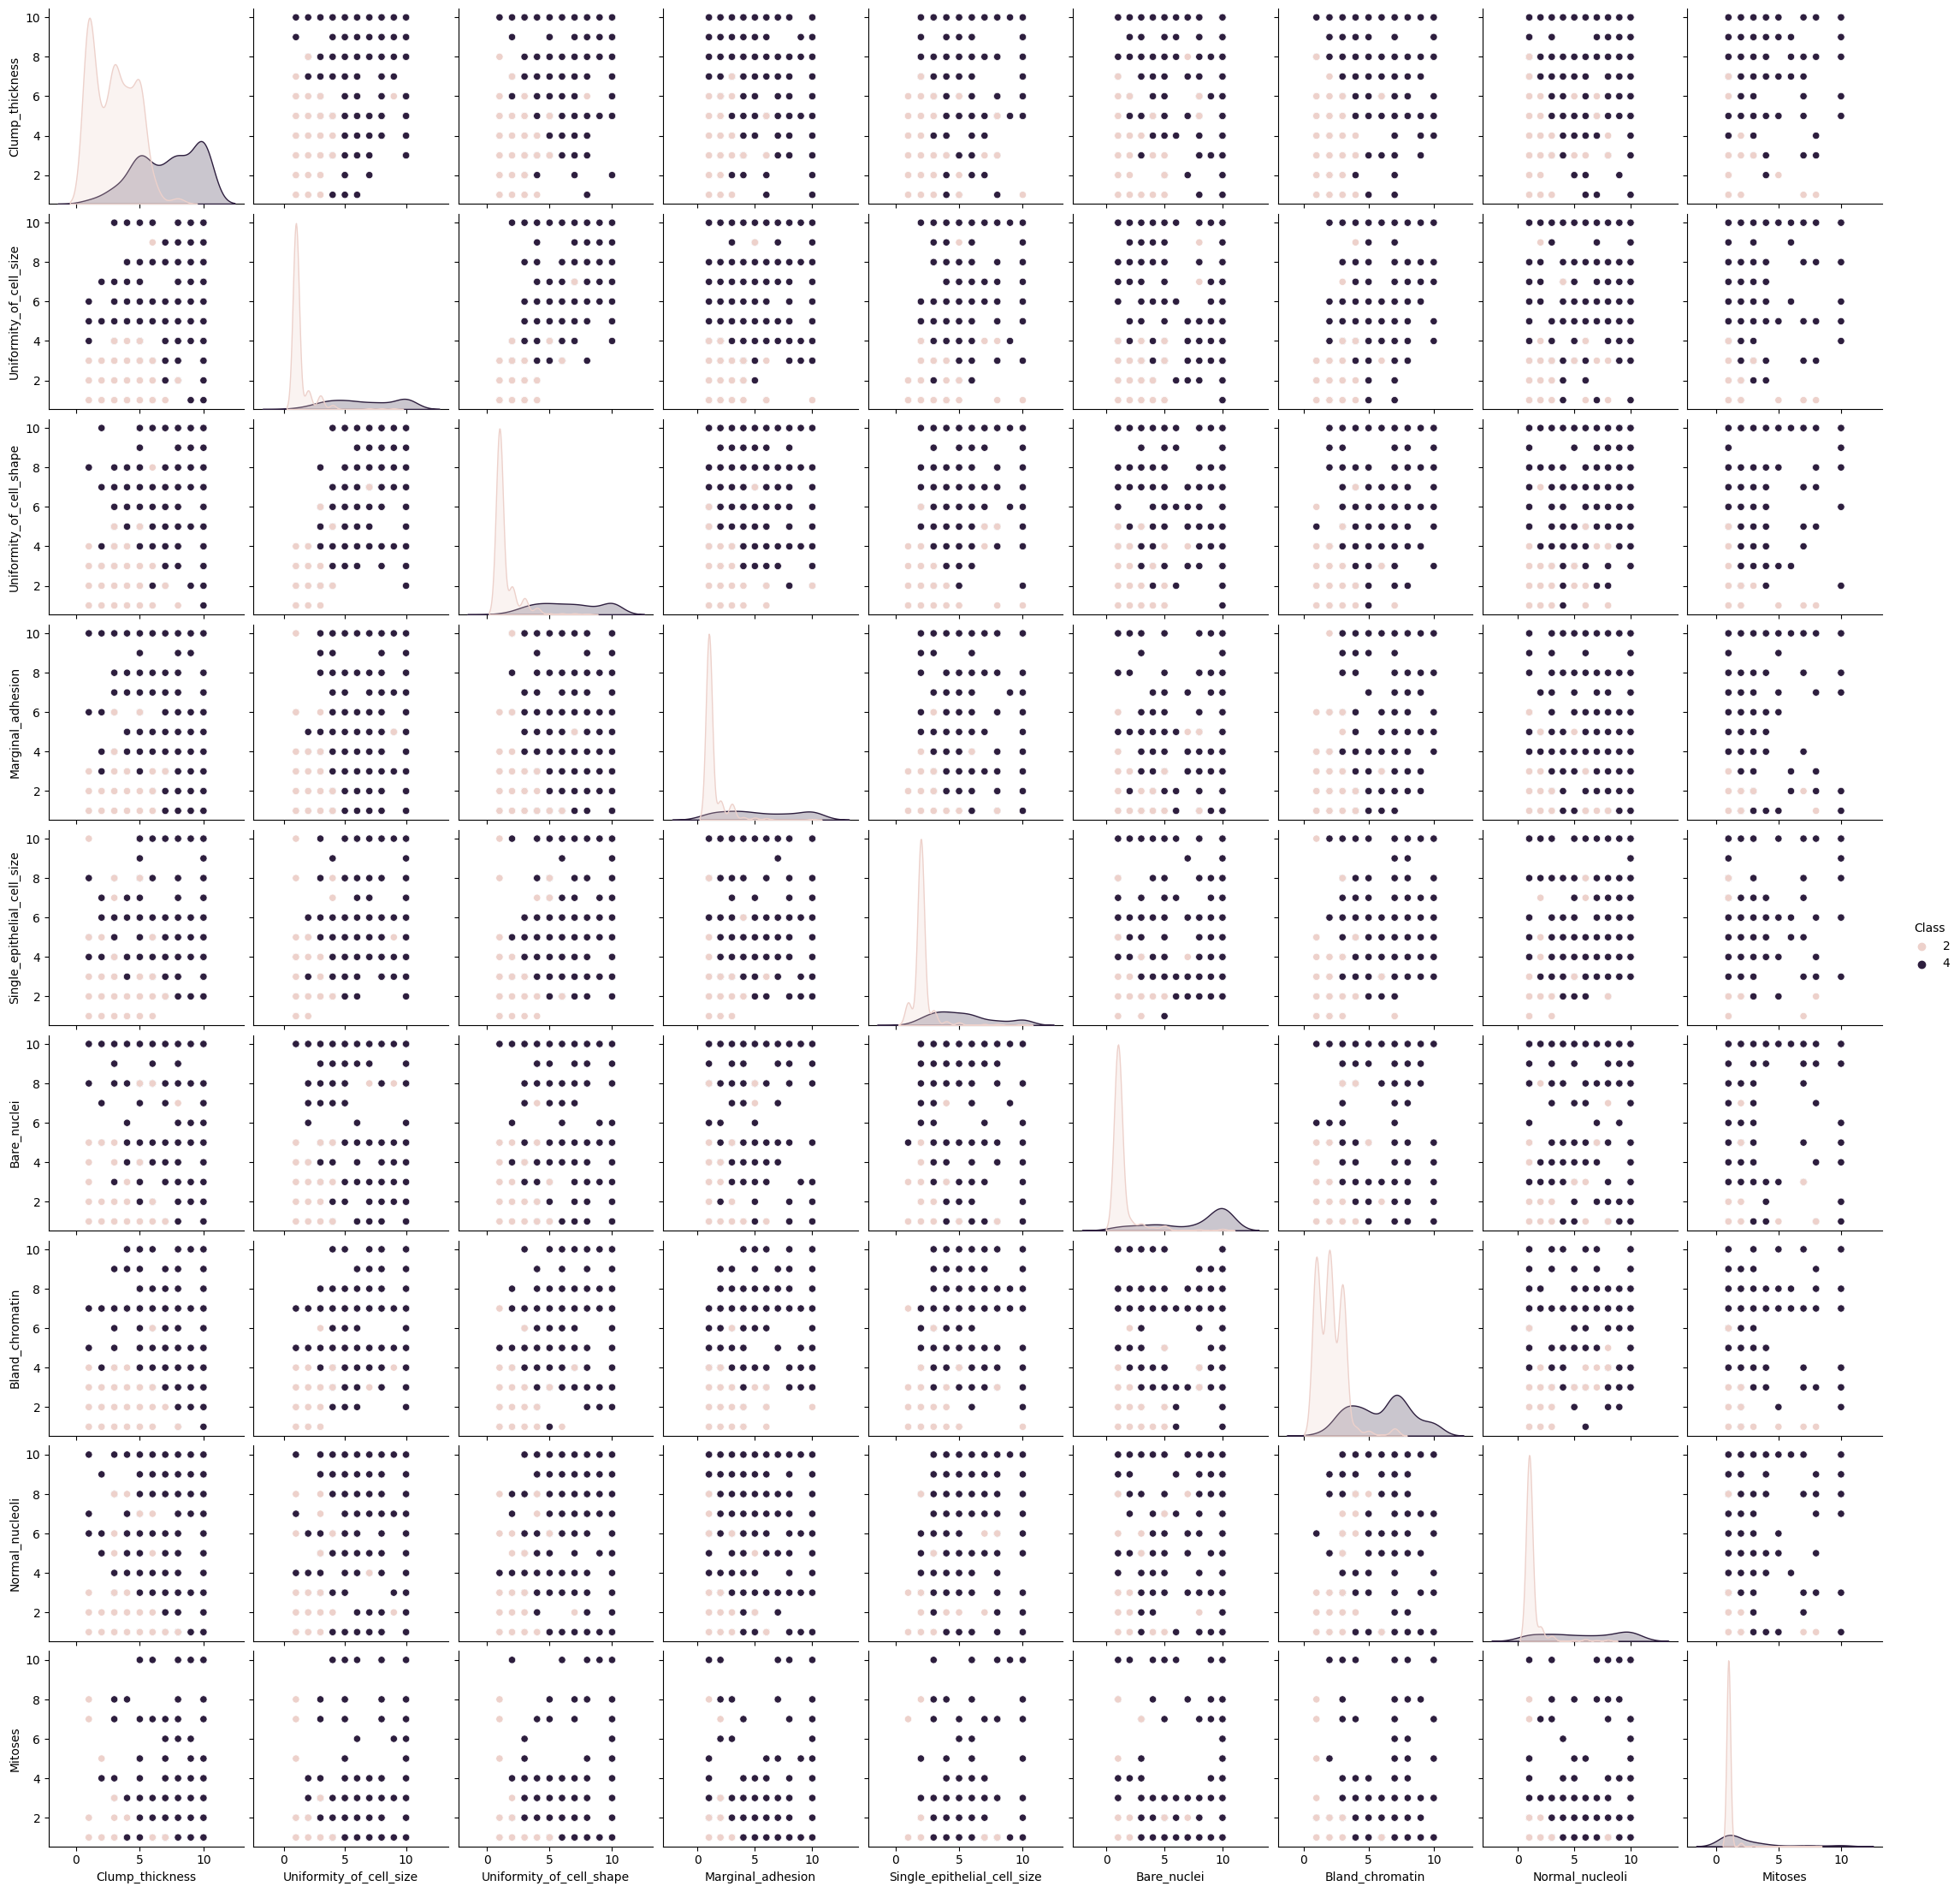

In [16]:
sns.pairplot(df, diag_kind = "kde",  hue = "Class")

In [17]:
df.nunique()

Clump_thickness                10
Uniformity_of_cell_size        10
Uniformity_of_cell_shape       10
Marginal_adhesion              10
Single_epithelial_cell_size    10
Bare_nuclei                    10
Bland_chromatin                10
Normal_nucleoli                10
Mitoses                         9
Class                           2
dtype: int64

In [91]:
df.corr()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity_of_cell_size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity_of_cell_shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single_epithelial_cell_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


<Axes: >

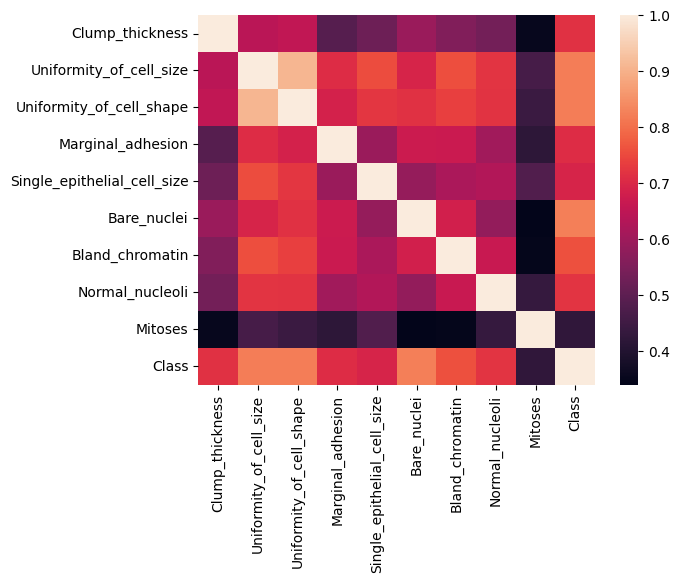

In [18]:
sns.heatmap(df.corr())

<Axes: xlabel='Class', ylabel='Clump_thickness'>

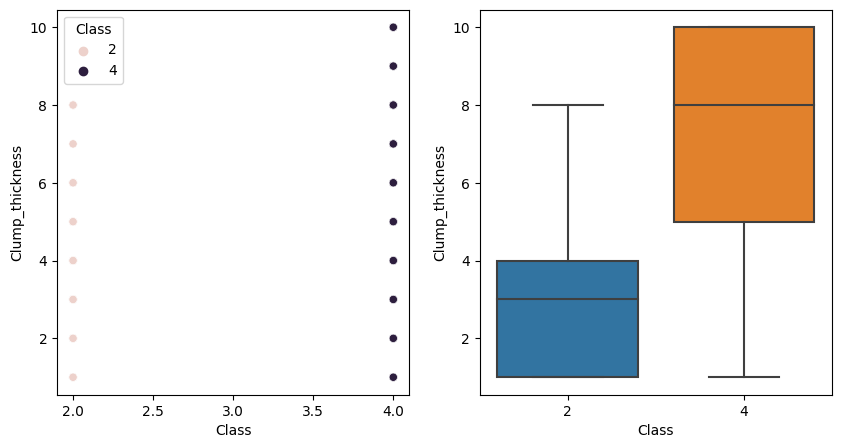

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Clump_thickness", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y= "Clump_thickness")

<Axes: xlabel='Class', ylabel='Uniformity_of_cell_size'>

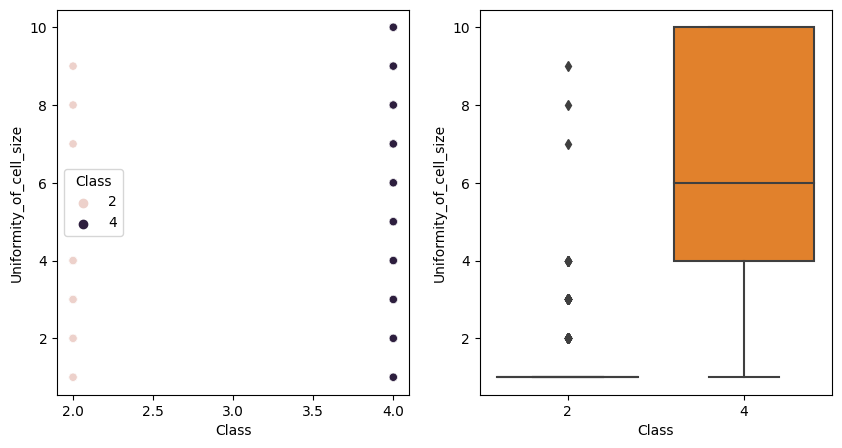

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Uniformity_of_cell_size", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y = "Uniformity_of_cell_size")

<Axes: xlabel='Class', ylabel='Uniformity_of_cell_shape'>

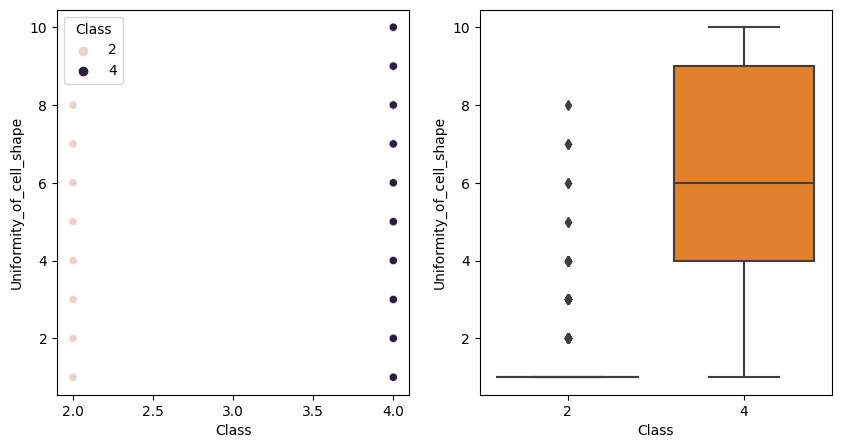

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Uniformity_of_cell_shape", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y = "Uniformity_of_cell_shape")

<Axes: xlabel='Class', ylabel='Marginal_adhesion'>

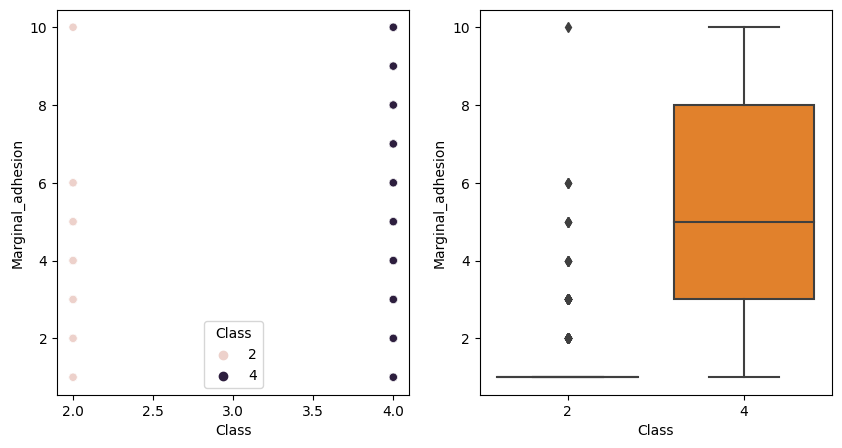

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Marginal_adhesion", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y = "Marginal_adhesion")

<Axes: xlabel='Class', ylabel='Single_epithelial_cell_size'>

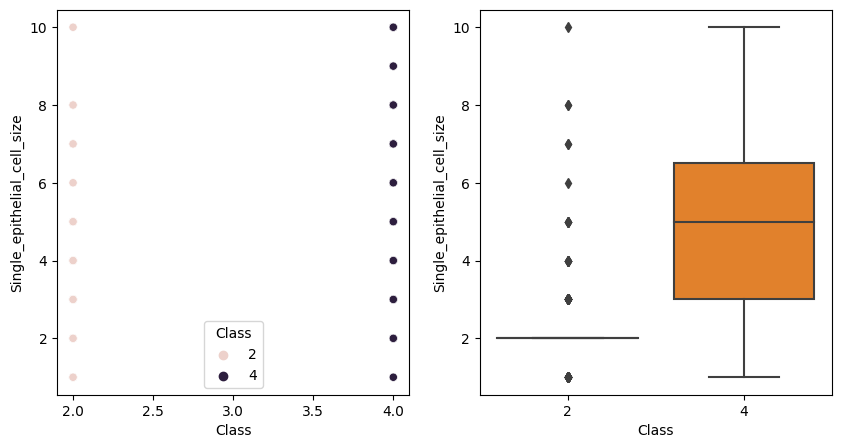

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Single_epithelial_cell_size", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y = "Single_epithelial_cell_size")

<Axes: xlabel='Class', ylabel='Bare_nuclei'>

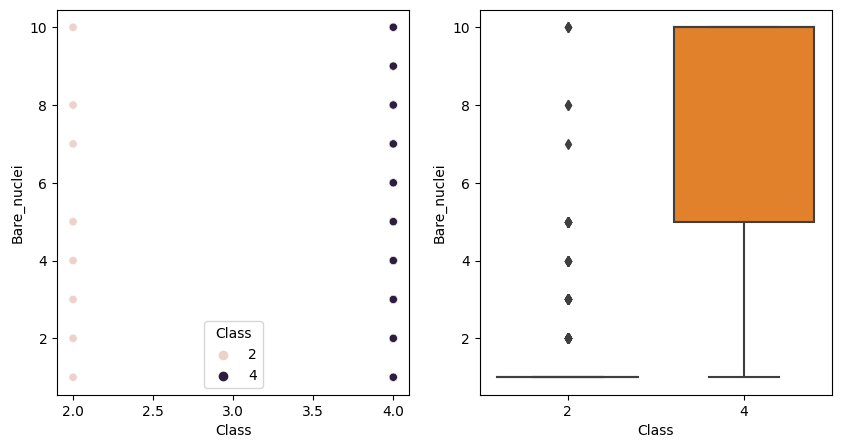

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Bare_nuclei", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y = "Bare_nuclei")

<Axes: xlabel='Class', ylabel='Bland_chromatin'>

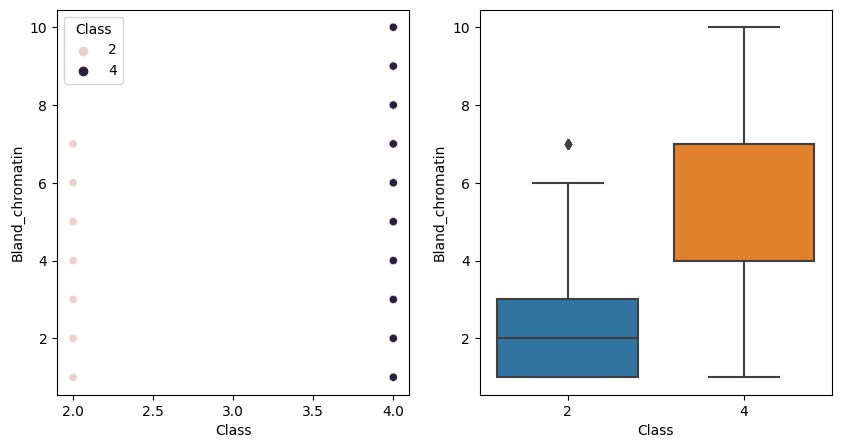

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Bland_chromatin", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y = "Bland_chromatin")

<Axes: xlabel='Class', ylabel='Normal_nucleoli'>

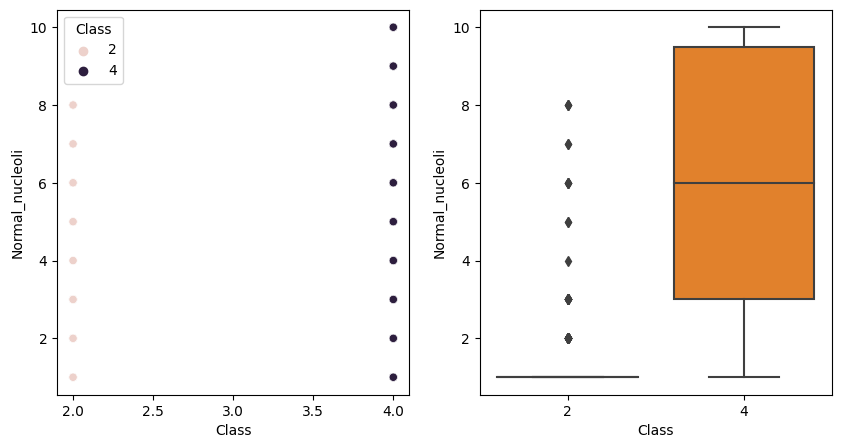

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Normal_nucleoli", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y = "Normal_nucleoli")

<Axes: xlabel='Class', ylabel='Mitoses'>

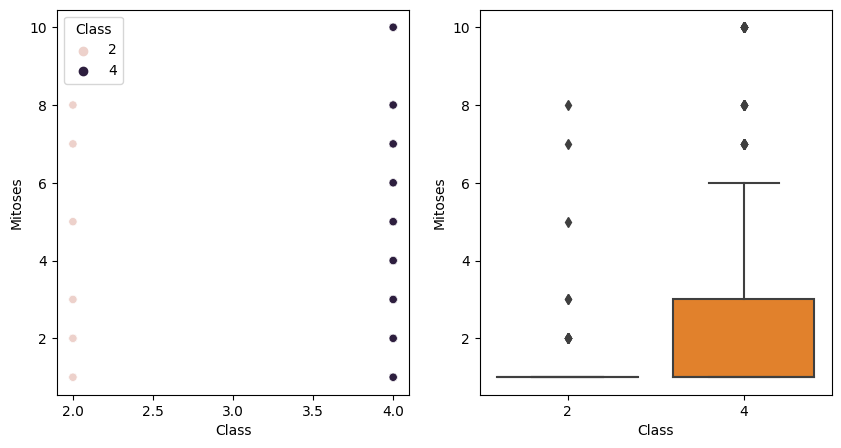

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = "Class", y = "Mitoses", hue = "Class")

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "Class", y = "Mitoses")

In [28]:
#modeller için class sütunundaki 2 ve 4 değerlerini binary hale getireceğiz

In [29]:
df["Class"].replace({2 : 0 , 4 : 1}, inplace = True)

C:\Users\yigit\AppData\Local\Temp\ipykernel_16084\2656030849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"].replace({2 : 0 , 4 : 1}, inplace = True)


In [30]:
df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              683 non-null    int64  
 1   Uniformity_of_cell_size      683 non-null    int64  
 2   Uniformity_of_cell_shape     683 non-null    int64  
 3   Marginal_adhesion            683 non-null    int64  
 4   Single_epithelial_cell_size  683 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              683 non-null    int64  
 7   Normal_nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
 9   Class                        683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB


## Train Test Split

In [32]:
x = df.drop(["Class"], axis = 1)
y = df["Class"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# MODELLER

## XGBoost Classification

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
import xgboost as xgb
from xgboost import XGBClassifier

In [37]:
xgb = XGBClassifier(objective = "binary:logistic")
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
predictions = xgb.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, auc

In [40]:
xgb_accuracy = accuracy_score(y_test, predictions)
xgb_precision = precision_score(y_test, predictions)
xgb_recall = recall_score(y_test, predictions)
xgb_roc_auc = roc_auc_score(y_test, predictions)

In [41]:
xgb_accuracy

0.9416058394160584

In [42]:
xgb_precision

0.9629629629629629

In [43]:
xgb_recall

0.896551724137931

In [44]:
xgb_roc_auc

0.9356176342208643

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
LogisticReg = LogisticRegression()
LogisticReg.fit(x_train, y_train)

LogisticRegression()

In [47]:
predictions = LogisticReg.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0], dtype=int64)

In [48]:
LogisticReg_accuracy = accuracy_score(y_test, predictions)
LogisticReg_precision = precision_score(y_test, predictions)
LogisticReg_recall = recall_score(y_test, predictions)
LogisticReg_roc_auc = roc_auc_score(y_test, predictions)

In [49]:
LogisticReg_accuracy

0.9562043795620438

In [50]:
LogisticReg_precision

0.9814814814814815

In [51]:
LogisticReg_recall

0.9137931034482759

In [52]:
LogisticReg_roc_auc

0.9505674378000872

## Random Forest Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators = 150, random_state = 42)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [55]:
predictions = rfc.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0], dtype=int64)

In [56]:
rfc_accuracy = accuracy_score(y_test, predictions)
rfc_precision = precision_score(y_test, predictions)
rfc_recall = recall_score(y_test, predictions)
rfc_roc_auc = roc_auc_score(y_test, predictions)

In [57]:
rfc_accuracy

0.9562043795620438

In [58]:
rfc_precision

0.9814814814814815

In [59]:
rfc_recall

0.9137931034482759

In [60]:
rfc_roc_auc

0.9505674378000872

## Support Vector Classification

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC(kernel = "rbf", C = 1.0, random_state = 42)
svc.fit(x_train, y_train)

SVC(random_state=42)

In [63]:
predictions = svc.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0], dtype=int64)

In [64]:
svc_accuracy = accuracy_score(y_test, predictions)
svc_precision = precision_score(y_test, predictions)
svc_recall = recall_score(y_test, predictions)
svc_roc_auc = roc_auc_score(y_test, predictions)

In [65]:
svc_accuracy

0.948905109489051

In [66]:
svc_precision

0.9636363636363636

In [67]:
svc_recall

0.9137931034482759

In [68]:
svc_roc_auc

0.9442383238760367

## Neural Network Classification

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
nnc = MLPClassifier(hidden_layer_sizes = (100,), max_iter=200, random_state=42)
nnc.fit(x_train, y_train)

C:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [71]:
predictions = nnc.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0], dtype=int64)

In [72]:
nnc_accuracy = accuracy_score(y_test, predictions)
nnc_precision = precision_score(y_test, predictions)
nnc_recall = recall_score(y_test, predictions)
nnc_roc_auc = roc_auc_score(y_test, predictions)

In [73]:
nnc_accuracy

0.9416058394160584

In [74]:
nnc_precision

0.9807692307692307

In [75]:
nnc_recall

0.8793103448275862

In [76]:
svc_roc_auc

0.9442383238760367

## Sequential Model

In [77]:
import tensorflow as tf

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [79]:
model = Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [80]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), verbose = 1, epochs = 500)

Epoch 1/500
18/18 [==============================] - 1s 9ms/step - loss: 0.6036 - accuracy: 0.7619 - val_loss: 0.5219 - val_accuracy: 0.8394
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.8516 - val_loss: 0.4705 - val_accuracy: 0.8613
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8828 - val_loss: 0.4279 - val_accuracy: 0.8686
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.9103 - val_loss: 0.3984 - val_accuracy: 0.8832
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.9103 - val_loss: 0.3757 - val_accuracy: 0.8905
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.9121 - val_loss: 0.3657 - val_accuracy: 0.8905
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.9158 - val_loss: 0.3698 - val_accuracy: 0.8978
Epoch 8/500
1

In [81]:
loss = pd.DataFrame(model.history.history)

<Axes: >

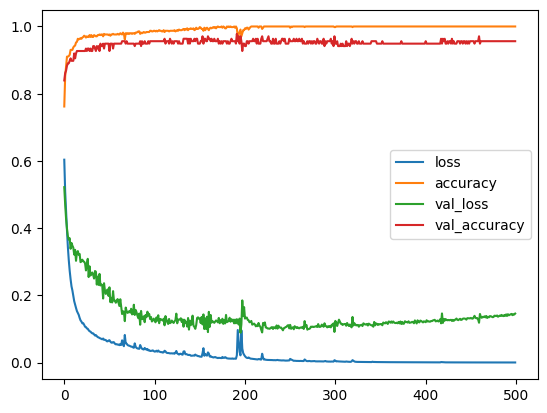

In [82]:
loss.plot()

In [83]:
predictions = model.predict(x_test)
predictions

5/5 [==============================] - 0s 4ms/step


array([[1.00000000e+00],
       [9.99960721e-01],
       [9.27797682e-12],
       [3.24925226e-11],
       [5.52484317e-12],
       [4.54631367e-11],
       [1.30642652e-08],
       [4.71725662e-06],
       [9.99999821e-01],
       [3.26392234e-12],
       [5.80243405e-12],
       [1.70046116e-14],
       [4.50717152e-09],
       [6.96200361e-16],
       [9.99940574e-01],
       [1.00000000e+00],
       [1.83384475e-15],
       [3.42618197e-01],
       [4.57130727e-06],
       [1.00000000e+00],
       [9.99998629e-01],
       [2.15397322e-09],
       [1.00000000e+00],
       [9.27797682e-12],
       [1.16384902e-09],
       [3.05320981e-12],
       [1.00000000e+00],
       [1.00000000e+00],
       [8.80495289e-14],
       [1.00000000e+00],
       [5.80243405e-12],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99930501e-01],
       [2.36022736e-13],
       [3.05320981e-12],
       [1.00000000e+00],
       [2.64668607e-08],
       [9.99352217e-01],
       [1.00000000e+00],


In [84]:
model_accuracy = accuracy_score(y_test, predictions.round())
model_precision = precision_score(y_test, predictions.round())
model_recall = recall_score(y_test, predictions.round())
model_roc_auc = roc_auc_score(y_test, predictions)

In [85]:
model_accuracy

0.9562043795620438

In [86]:
model_precision

0.9482758620689655

In [87]:
model_recall

0.9482758620689655

In [88]:
model_roc_auc

0.9960715844609341

## RAPOR

In [89]:
a = np.array([[xgb_accuracy, xgb_precision, xgb_recall, xgb_roc_auc],
              [LogisticReg_accuracy, LogisticReg_precision, LogisticReg_recall, LogisticReg_roc_auc],
              [rfc_accuracy, rfc_precision, rfc_recall, rfc_roc_auc],
              [svc_accuracy, svc_precision, svc_recall, svc_roc_auc],
              [nnc_accuracy, nnc_precision, nnc_recall, nnc_roc_auc],
              [model_accuracy, model_precision, model_recall, model_roc_auc]])
Report = pd.DataFrame(a, index = ["XGBoost Classification", "Logistic Regression", "Random Forest Classification",
                                   "Support Vector Classification", "Neural Network Classification", "Sequential Classification"],
                       columns = ["Acuuracy", "Precision", "Recall", "ROC AUC Score"])

In [90]:
Report

,Acuuracy,Precision,Recall,ROC AUC Score
XGBoost Classification,0.941606,0.962963,0.896552,0.935618
Logistic Regression,0.956204,0.981481,0.913793,0.950567
Random Forest Classification,0.956204,0.981481,0.913793,0.950567
Support Vector Classification,0.948905,0.963636,0.913793,0.944238
Neural Network Classification,0.941606,0.980769,0.879310,0.933326
Sequential Classification,0.956204,0.948276,0.948276,0.996072
